# Setup

In [1]:
%load_ext dotenv

In [2]:
%dotenv

In [3]:
import pandas as pd
import os
import numpy as np
import requests
import spotipy
from itertools import chain
import matplotlib.pyplot as plt
import plotly
import nltk
import seaborn as sns

## Load envs

https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-analysis
https://developer.spotify.com/documentation/web-api/reference/#object-trackobject
https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-tracks
https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-recently-played
https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features
https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d
https://towardsdatascience.com/spotify-api-audio-features-5d8bcbd780b2
https://medium.com/analytics-vidhya/easily-analyse-audio-features-from-spotify-playlists-part-1-3b004cd406b3

In [4]:
USERNAME = os.environ.get('USERNAME')
CLIENT_ID =os.environ.get('CLIENT_ID')
CLIENT_SECRET = os.environ.get('CLIENT_SECRET')
REDIRECT_URI = os.environ.get('REDIRECT_URI')

AUTH_URL = 'https://accounts.spotify.com/api/token'
SCOPE_RECENTLY_PLAYED = 'player/recently-played'
BASE_URL = 'https://api.spotify.com/v1/me'

# Top artists 

In [5]:
top_artists_long = pd.read_csv(r"C:\Users\Ale\Desktop\Data\top_artists_long.csv")
top_artists_long = top_artists_long.drop(['Unnamed: 0'], axis = 1)
top_artists_long.head(10)

,uri,name,genres,popularity,followers
0,spotify:artist:7f5Zgnp2spUuuzKplmRkt7,Lost Frequencies,"['belgian edm', 'edm', 'pop', 'pop dance', 'tr...",80,2256597
1,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"['chicago rap', 'rap']",96,15344040
2,spotify:artist:5Pb27ujIyYb33zBqVysBkj,RÜFÜS DU SOL,"['australian electropop', 'indietronica']",73,838195
3,spotify:artist:1hzfo8twXdOegF3xireCYs,Milky Chance,['german pop'],75,1544160
4,spotify:artist:24DO0PijjITGIEWsO8XaPs,Nora En Pure,"['deep house', 'electra', 'house', 'progressiv...",66,289682
5,spotify:artist:23fqKkggKUBHNkbKtXEls4,Kygo,"['edm', 'pop', 'pop dance', 'tropical house']",84,7729283
6,spotify:artist:4WN5naL3ofxrVBgFpguzKo,Rudimental,"['dance pop', 'edm', 'house', 'pop', 'pop danc...",74,1297994
7,spotify:artist:73jBynjsVtofjRpdpRAJGk,Dimitri Vegas & Like Mike,"['belgian dance', 'belgian edm', 'big room', '...",75,3113492
8,spotify:artist:2feDdbD5araYcm6JhFHHw7,Labrinth,"['indie poptimism', 'pop']",80,1729454
9,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Rihanna,"['barbadian pop', 'dance pop', 'pop', 'pop rap...",90,45260262


In [6]:
top_artists_long.popularity.describe()

count     50.000000
mean      78.700000
std       10.562255
min       47.000000
25%       73.000000
50%       78.500000
75%       85.750000
max      100.000000
Name: popularity, dtype: float64

In [7]:
top_artists_long.followers.describe()

count    5.000000e+01
mean     1.104798e+07
std      1.730489e+07
min      4.007400e+04
25%      1.008461e+06
50%      3.610194e+06
75%      1.461854e+07
max      8.618541e+07
Name: followers, dtype: float64

In [8]:
top_artists_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uri         50 non-null     object
 1   name        50 non-null     object
 2   genres      50 non-null     object
 3   popularity  50 non-null     int64 
 4   followers   50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [9]:
top_artists_long.genres

0     ['belgian edm', 'edm', 'pop', 'pop dance', 'tr...
1                                ['chicago rap', 'rap']
2             ['australian electropop', 'indietronica']
3                                        ['german pop']
4     ['deep house', 'electra', 'house', 'progressiv...
5         ['edm', 'pop', 'pop dance', 'tropical house']
6     ['dance pop', 'edm', 'house', 'pop', 'pop danc...
7     ['belgian dance', 'belgian edm', 'big room', '...
8                            ['indie poptimism', 'pop']
9     ['barbadian pop', 'dance pop', 'pop', 'pop rap...
10                                ['electropop', 'pop']
11    ['dance pop', 'dutch edm', 'edm', 'pop', 'pop ...
12    ['belo horizonte indie', 'brazilian edm', 'fun...
13    ['dutch trance', 'edm', 'pop dance', 'progress...
14                                    ['pop', 'uk pop']
15                         ['british soul', 'neo soul']
16                ['pop', 'r&b', 'uk contemporary r&b']
17    ['dance pop', 'deep euro house', 'deep hou

In [9]:
genres_df = pd.DataFrame

<AxesSubplot:xlabel='genres', ylabel='count'>

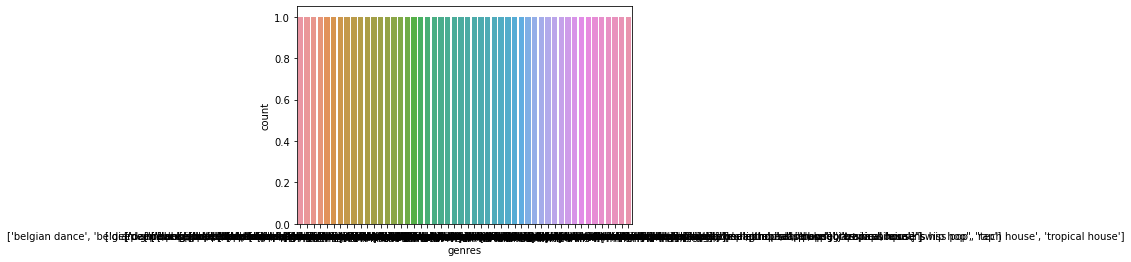

In [18]:
sns.countplot(x="genres", data=top_artists_long)

In [11]:
d = top_artists_long['genres'].apply(lambda x: extract(r"(?<!\\)(?:\\\\)*'([^'\\]*(?:\\.[^'\\]*)*)'"))
d

NameError: name 'extract' is not defined

In [ ]:
def get_genres(df, col):
    for index in range(col):
        

In [8]:
c = top_artists_long['genres'].str.extract(r"(?<!\\)(?:\\\\)*'([^'\\]*(?:\\.[^'\\]*)*)'")
c

,0
0,belgian edm
1,chicago rap
2,australian electropop
3,german pop
4,deep house
5,edm
6,dance pop
7,belgian dance
8,indie poptimism
9,barbadian pop


In [50]:
d = top_artists_long['genres']
d[0]

"['belgian edm', 'edm', 'pop', 'pop dance', 'tropical house']"

# Tracks Saved

First look in the 50th recent songs saved in my library (in October/21)

In [9]:
tracks_saved = pd.read_csv(r"C:\Users\Ale\Desktop\Data\tracks_saved.csv")
tracks_saved = tracks_saved.drop(['Unnamed: 0'], axis = 1)
tracks_saved.head(10)

,track_uri,track_name,track_artist,added_at,duration_ms,popularity,album_name,album_release_date,preview_url
0,spotify:track:3W8KAzaYIKsCSGj8q8ltul,Father Ocean - Ben Böhmer Remix,"['Monolink', 'Ben Böhmer']",2021-10-18T16:59:35Z,476192,48,Father Ocean,2018-12-07,https://p.scdn.co/mp3-preview/bd704fc71292e55c...
1,spotify:track:2b6Qg13iooGb1LnBFwrtcH,After Earth,['Ben Böhmer'],2021-10-17T15:19:45Z,457301,44,Morning Falls EP,2018-01-05,https://p.scdn.co/mp3-preview/882b30ef349d291f...
2,spotify:track:6mjN72fXeZwLkCDG7rHH3N,After Earth - Edit,['Ben Böhmer'],2021-10-17T15:19:16Z,238406,49,Morning Falls EP,2018-01-05,https://p.scdn.co/mp3-preview/94b486ab380f9a20...
3,spotify:track:5kNv1Du0DqYgKkFgXiBRu3,Yours,"['ZHU', 'Arctic Lake']",2021-10-17T00:08:23Z,257734,46,Yours,2021-04-28,https://p.scdn.co/mp3-preview/783dc0dc84f3120c...
4,spotify:track:3zQpGaH50HeMjxurMZVF6q,Lifetime (with Ty Dolla $ign & 070 Shake),"['Swedish House Mafia', 'Ty Dolla $ign', '070 ...",2021-10-15T01:41:40Z,186805,74,Lifetime,2021-07-19,https://p.scdn.co/mp3-preview/19a577bc12a97e35...
5,spotify:track:4gvrJnKCKIPiacNsWVQwEU,love nwantiti (feat. Dj Yo! & AX'EL) - Remix,"['CKay', 'DJ Yo', ""AX'EL""]",2021-10-13T16:43:25Z,188368,92,love nwantiti (feat. Dj Yo! & AX'EL) [Remix],2021-09-09,https://p.scdn.co/mp3-preview/fbbecf458216fefa...
6,spotify:track:2g95XDCx4GqcaJPv7TTk8C,Skyscrapers - Hi-Lo Remix,"['Nina Kraviz', 'HI-LO', 'Oliver Heldens']",2021-10-08T22:07:11Z,296368,50,Skyscrapers (Hi-Lo Remix),2021-10-01,https://p.scdn.co/mp3-preview/23215101953bd899...
7,spotify:track:3ExRfIXdYwYFjRzsCw7L7S,Dancing People Are Never Wrong (Live In Munich...,"['Jan Blomqvist', 'The Bianca Story']",2021-10-08T00:21:12Z,283313,22,Disconnected - Live In Munich,2020-08-21,https://p.scdn.co/mp3-preview/c57c49aaf11ad6e3...
8,spotify:track:7hU3IHwjX150XLoTVmjD0q,MONEY,['LISA'],2021-10-06T22:07:03Z,168227,90,LALISA,2021-09-10,https://p.scdn.co/mp3-preview/01c7b7f27476d536...
9,spotify:track:6QcU4iwfLjjsrW7zsqyc1D,The Space In Between - Ben Böhmer Remix,"['Jan Blomqvist', 'Ben Böhmer']",2021-10-04T23:07:58Z,253812,54,The Space In Between (Ben Böhmer Remix),2018-06-29,https://p.scdn.co/mp3-preview/2887027c83d809f9...
